In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [147]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')

In [148]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [149]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [150]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [155]:
#Drope Unnecessary Columns
df1=df.drop(["PassengerId","Cabin","Name","Ticket"],axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [156]:
df1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


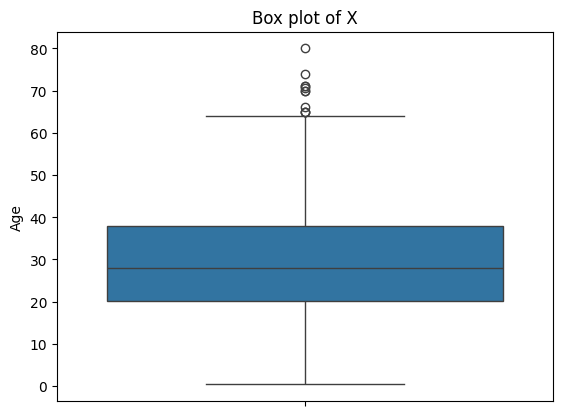

In [157]:
#Check Age outliers

sns.boxplot(df1["Age"])
plt.title("Box plot of X")
plt.show()

In [158]:
df1["Embarked"].value_counts()


,count
Embarked,
S,644
C,168
Q,77


In [159]:
df1["Age"]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [190]:
#Handling Null Values with median and mode

df1["Age"]=df1["Age"].fillna(df["Age"].median())
df1["Embarked"]=df1["Embarked"].fillna(df["Embarked"].mode()[0])

df1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [191]:
df1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [284]:
#Feature Binning

df1["Age_group"]=pd.cut(df1["Age"],bins=[0,18,35,65,85],labels=["Child","Adult","Senior","Most Senior"])
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,male,22.0,1,0,7.2500,S,Adult
1,1,1,female,38.0,1,0,71.2833,C,Senior
2,1,3,female,26.0,0,0,7.9250,S,Adult
3,1,1,female,35.0,1,0,53.1000,S,Adult
4,0,3,male,35.0,0,0,8.0500,S,Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Adult
887,1,1,female,19.0,0,0,30.0000,S,Adult
888,0,3,female,28.0,1,2,23.4500,S,Adult
889,1,1,male,26.0,0,0,30.0000,C,Adult


In [ ]:
# Visualization of this Data

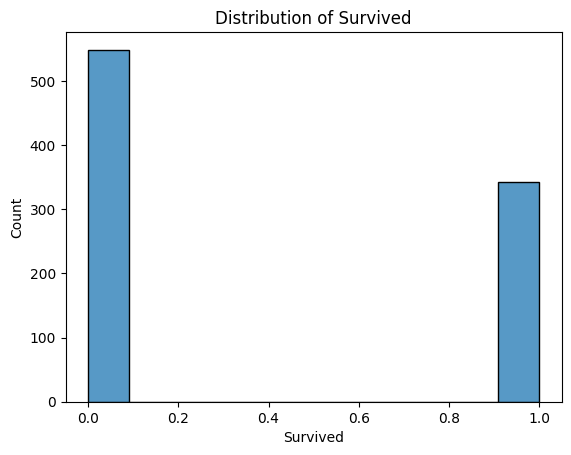

In [267]:
sns.histplot(x="Survived",data=df1)
plt.title("Distribution of Survived")
plt.show()

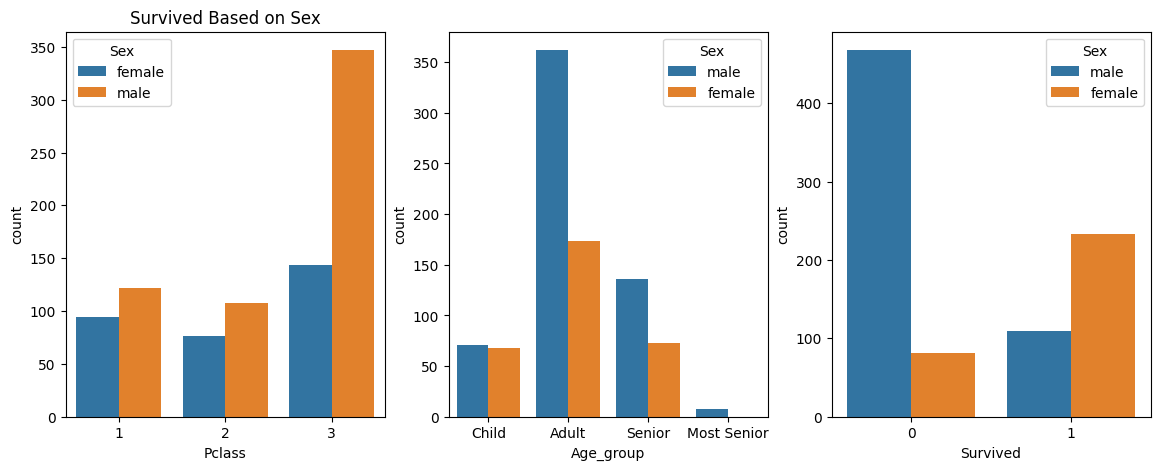

In [283]:
fig,ax=plt.subplots(1,3,figsize=(14,5))
sns.countplot(x="Pclass",data=df,hue="Sex",ax=ax[0])
sns.countplot(x="Age_group",data=df1,hue="Sex",ax=ax[1])
sns.countplot(x="Survived",data=df1,hue="Sex",ax=ax[2])
ax[0].set_title("PClass Based on Sex")
ax[0].set_title("Age Group Based on Sex")
ax[0].set_title("Survived Based on Sex")
plt.show()


In [253]:
sex_count=df["Sex"].value_counts()
sex_count

,count
Sex,
male,577
female,314


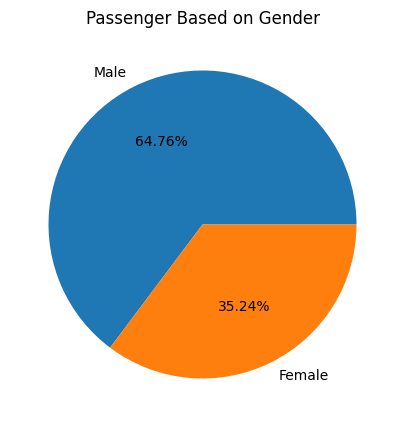

In [258]:
plt.figure(figsize=(10,5))
plt.pie(sex_count,labels=["Male","Female"],autopct='%1.2f%%')
plt.title("Passenger Based on Gender")
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

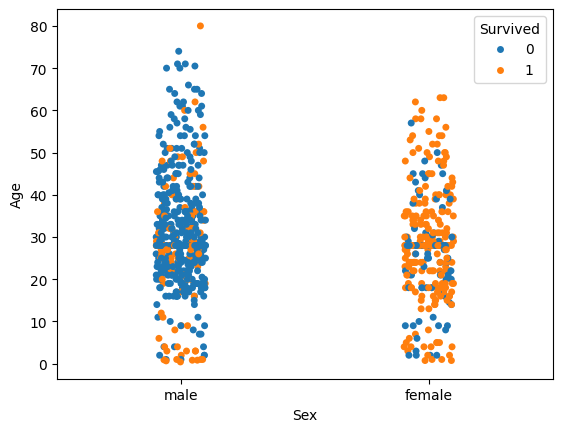

In [271]:
sns.stripplot(x="Sex",y="Age",data=df1,hue="Survived")

/tmp/ipython-input-2831472293.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["Age"],ax=ax[0])


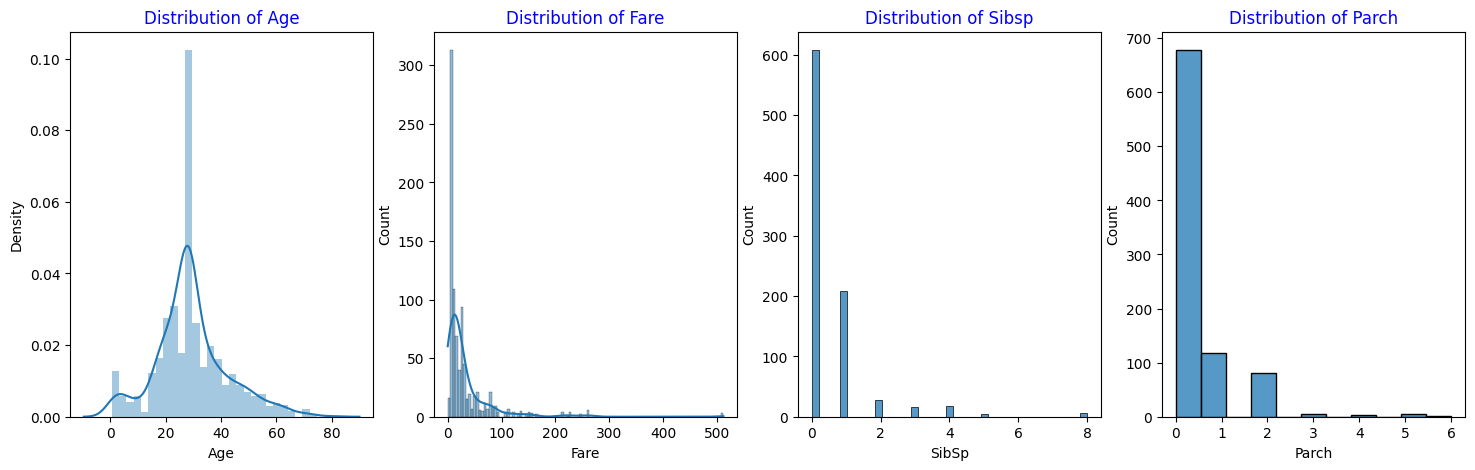

In [265]:
fig,ax=plt.subplots(1,4,figsize=(18,5))
sns.distplot(df1["Age"],ax=ax[0])
sns.histplot(df1["Fare"],ax=ax[1],kde=True)
sns.histplot(df1["SibSp"],ax=ax[2])
sns.histplot(df1["Parch"],ax=ax[3])


ax[0].set_title("Distribution of Age",color="Blue")
ax[1].set_title("Distribution of Fare",color="Blue")
ax[2].set_title("Distribution of Sibsp",color="Blue")
ax[3].set_title("Distribution of Parch",color="Blue")
plt.show()


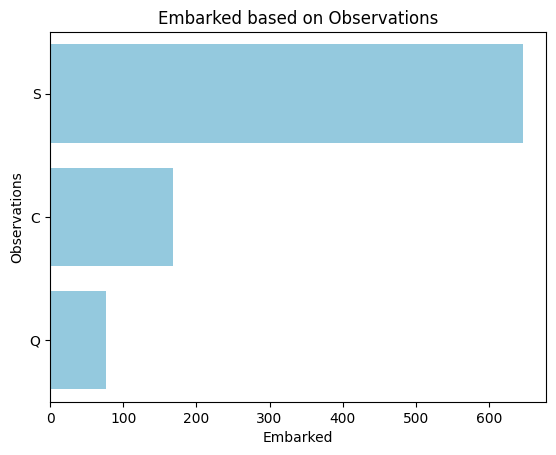

In [224]:
sns.countplot(df1["Embarked"],color="skyblue")
plt.title("Embarked based on Observations")
plt.xlabel("Embarked")
plt.ylabel("Observations")
plt.show()

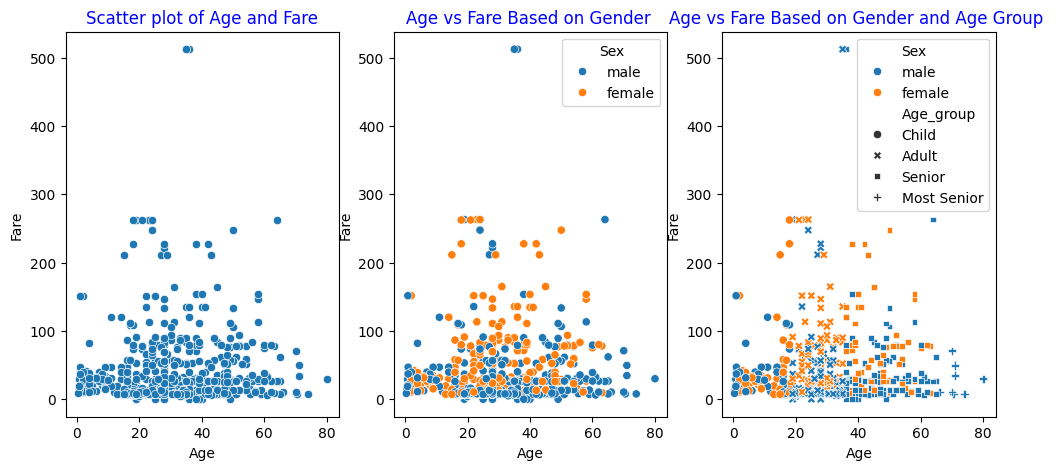

In [244]:
fig,ax=plt.subplots(1,3,figsize=(12,5))
sns.scatterplot(x="Age",y="Fare",data=df1,ax=ax[0])
sns.scatterplot(x="Age",y="Fare",data=df1,hue="Sex",ax=ax[1])
sns.scatterplot(x="Age",y="Fare",data=df1,hue="Sex",style="Age_group",ax=ax[2])
ax[0].set_title("Scatter plot of Age and Fare",color="Blue")
ax[1].set_title("Age vs Fare Based on Gender ",color="Blue")
ax[2].set_title("Age vs Fare Based on Gender and Age Group ",color="Blue")
plt.show()

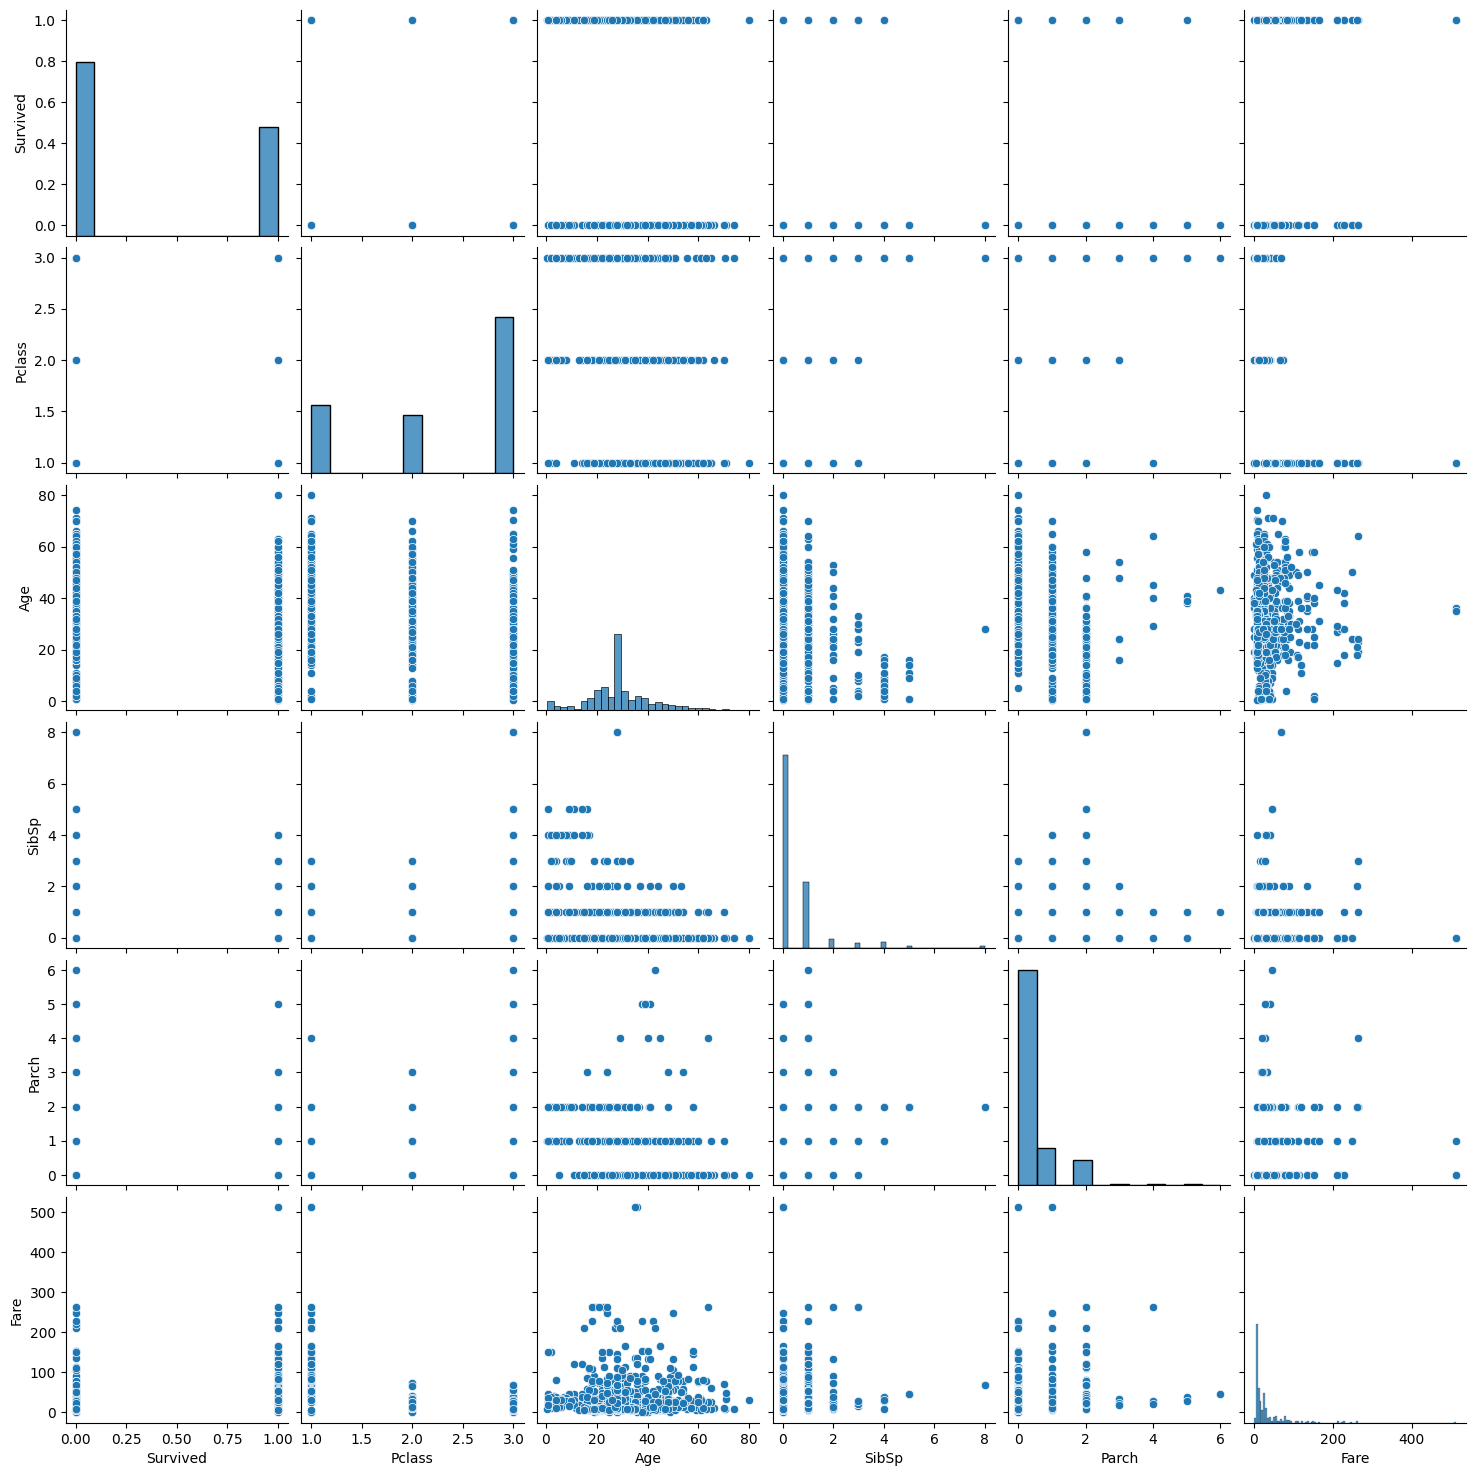

In [272]:
sns.pairplot(df1)

In [276]:
num_col=["Survived",	"Pclass","Age"	,"SibSp",	"Parch",	"Fare"]
num_col

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [280]:
cor=df1[num_col].corr()
cor

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<Axes: >

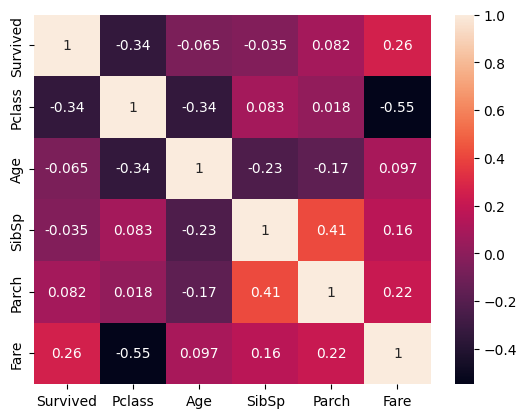

In [281]:
sns.heatmap(cor,annot=True)